# ***Exploratory Data Analysis***

This notebook shows the process of performing exploratory data analysis (EDA).

### ***Import packages***

Before we begin, let's import all the necessary packages for this notebook:

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Set plotting theme
sns.set_theme(style="whitegrid")

### ***Read data***

Next, let's read the data:

In [3]:
# Read data
annotated_df = pd.read_csv("annotated_data.csv")

# Add text length column
annotated_df["text_len"] = annotated_df.text.str.len()

# Print data
annotated_df

,id,text,label_mean,hate_label,hate_target_label,implicit_hate,Unnamed: 6,Unnamed: 7,Unnamed: 8,text_len
0,01826318d80e4f8fbe98c21b8b136837,How can the left or anyone say President Trump...,2.500000,no,NaN,NaN,NaN,NaN,NaN,319
1,0f4cbcd7375445619ba30641618b10dc,THREE DEJECTED DIRTY JEWS....BURN IN HELL YOU ...,5.000000,yes,jews,no,NaN,NaN,NaN,121
2,0fed479bd13f4acc95f37cf16cfc2253,Join the #military #goyim and die for #israel ...,4.000000,yes,jews,yes,NaN,NaN,NaN,117
3,102700822e39422cbe745e7d308cd2e2,#H8 #MUSLIMS\n#ISLAM\n#BARBARIC\n#PIGS\nWIPE O...,5.000000,yes,muslims,no,NaN,55.0,hate_target_label,87
4,11beff10aabd40aabd9abb34c438c297,Tell me again how muslims are hard working and...,5.000000,yes,muslims,yes,NaN,49.0,NaN,132
...,...,...,...,...,...,...,...,...,...,...
99,e5e7d62b2510423bb4ceabfcaf75ea02,I'm following irredeemable deplorables ONLY! \...,5.000000,yes,muslims,no,NaN,NaN,NaN,125
100,f0d7804ac7fd48ac84b8c3f40940805c,OOPS .. I Hate That When That Happens .. The S...,1.000000,no,NaN,NaN,NaN,NaN,NaN,91
101,f891b0f3b3a24da78bbe5a2cae4b722a,Black trash!,3.666667,yes,blacks,no,NaN,NaN,NaN,12
102,f9b10d8dd1404508a7c20e9227b229a4,If Trump loses the election he won't be loser ...,1.000000,no,NaN,NaN,NaN,NaN,NaN,91


### ***Plot interesting elements in the data***

Next, let's creates some plots of the data. We begin with comparing the text length for hat and non-hate groups:

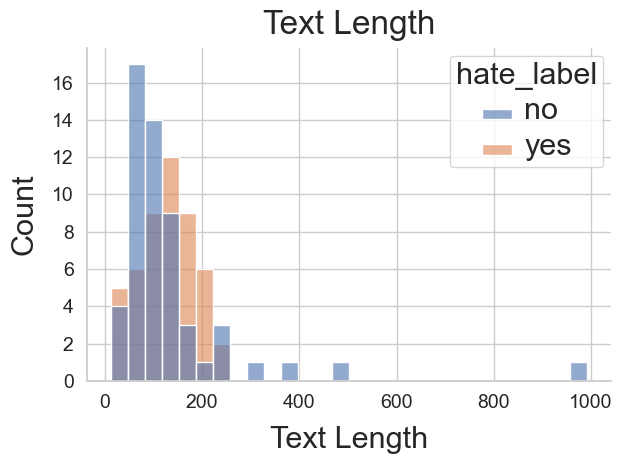

In [4]:
fig, ax = plt.subplots(1)
ax = sns.histplot(
    annotated_df, x="text_len", hue="hate_label", alpha=0.6, ax=ax, stat="count"
)
plt.xlabel("Text Length", labelpad=10, fontsize=22)
plt.xticks(fontsize=14)
plt.ylabel("Count", labelpad=10, fontsize=22)
plt.yticks(fontsize=14)
plt.title("Text Length", pad=10, fontsize=24)
sns.despine()
plt.setp(ax.get_legend().get_texts(), fontsize='22')
plt.setp(ax.get_legend().get_title(), fontsize='22')
plt.tight_layout()
plt.show()

Next, let's plot how many of the records in the data are hate & non-hate:

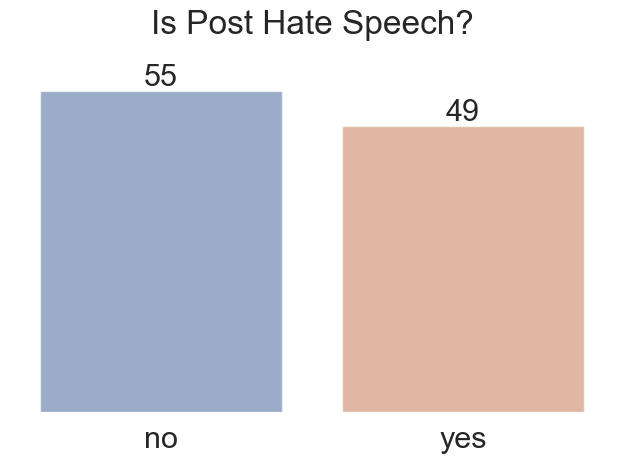

In [5]:
fig, ax = plt.subplots(1, )
ax = sns.countplot(annotated_df, x="hate_label", alpha=0.6)
ax.bar_label(ax.containers[0], fontsize=22)
plt.xlabel("")
plt.ylabel("")
plt.yticks([], fontsize=22)
plt.xticks(fontsize=22)
plt.title("Is Post Hate Speech?", pad=30, fontsize=24)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

Next, let's plot how many of the hate records we have per group and if they are implicit or explicit:

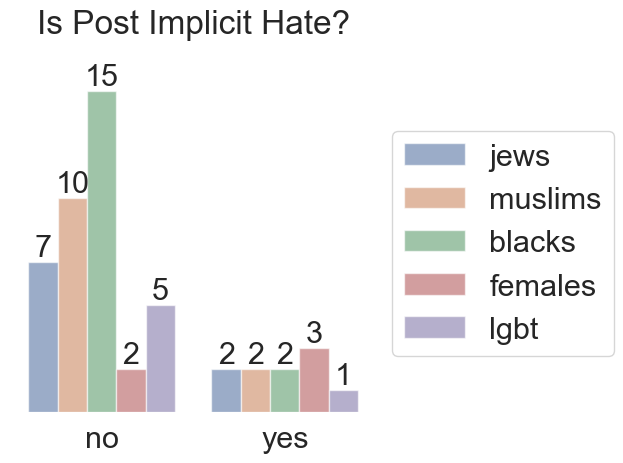

In [6]:
fig, ax = plt.subplots(1)
ax = sns.countplot(annotated_df, x="implicit_hate", hue="hate_target_label", alpha=0.6)
for container in ax.containers:
    ax.bar_label(container, fontsize=22)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
plt.xlabel("")
plt.ylabel("")
plt.yticks([])
plt.xticks(fontsize=22)
plt.title("Is Post Implicit Hate?", pad=30, fontsize=24)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()